## Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением accuracy. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте accuracy на тестовой выборке самостоятельно.

### Структура данных:

+ сalls — количество звонков,
+ minutes — суммарная длительность звонков в минутах,
+ messages — количество sms-сообщений,
+ mb_used — израсходованный интернет-трафик в Мб,
+ is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

### План работы:

1. Изучить файл с данными.
2. Разбить данные на три выборки: обучающая, валидационная и тестовая.
3. Исследовать три модели классификации: Решающее дерево, Случайный лес и Логистическая регрессия.
4. Найти оптимальные параметры для каждой модели и выбрать одну из них для обучения модели.
5. Оценить точность обученной модели.
6. Оценить адекватность модели.

### 1.Изучаем данные:

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


<b>Вывод по разделу 1</b>

Перед нами стоит задача классификации. За целевой признак берем столбец is_ultra. Остальные признаки помогут нам предсказывать решение по столбцу is_ultra.

### 2. Разбиваем данные на выборки

In [5]:
train, test = train_test_split(df,test_size=0.4,random_state=42)
val, test = train_test_split(test,test_size=0.5,random_state=42)

print('Размер тренирующей выборки:', train.shape[0])
print('Размер валидационной выборки:', val.shape)
print('Размер тестовой выборки:', test.shape)

Размер тренирующей выборки: 1928
Размер валидационной выборки: (643, 5)
Размер тестовой выборки: (643, 5)


Составим таблицы признаков и целевого признака для каждого датасета

In [6]:
train_features = train.drop(['is_ultra'],axis=1)
train_target = train['is_ultra']

val_features = val.drop(['is_ultra'],axis=1)
val_target = val['is_ultra']

test_features = test.drop(['is_ultra'],axis=1)
test_target = test['is_ultra']

<b>Вывод по разделу 2:</b>

Данные были разбиты по принципу 60/20/20.

+ Обучение пройдет на данных train.
+ Валидация модели на данных valid.
+ Лучшая модель по валидации будет применена на данных test.

### 3.Исследуем модели

####  3.1 Модель Дерева выбора. 

Изменим в цикле гиперпараметр max_depth

In [7]:
%%time

best_depth = 0
best_accuracy = 0

for depth in range(1,101):
    model = DecisionTreeClassifier(random_state=42, max_depth=depth)
    model.fit(train_features, train_target)
    val_predictions = model.predict(val_features)
    accuracy = accuracy_score(val_target, val_predictions)
    print('Глубина дерева', depth,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_depth = depth
        best_accuracy = accuracy

print('Лучшая глубина дерева', best_depth,'Лучшая точность', best_accuracy)     

Глубина дерева 1 Точность 0.7309486780715396
Глубина дерева 2 Точность 0.7822706065318819
Глубина дерева 3 Точность 0.7916018662519441
Глубина дерева 4 Точность 0.7807153965785381
Глубина дерева 5 Точность 0.7729393468118196
Глубина дерева 6 Точность 0.776049766718507
Глубина дерева 7 Точность 0.7807153965785381
Глубина дерева 8 Точность 0.7962674961119751
Глубина дерева 9 Точность 0.7807153965785381
Глубина дерева 10 Точность 0.7947122861586314
Глубина дерева 11 Точность 0.7853810264385692
Глубина дерева 12 Точность 0.7869362363919129
Глубина дерева 13 Точность 0.7791601866251944
Глубина дерева 14 Точность 0.7713841368584758
Глубина дерева 15 Точность 0.7682737169517885
Глубина дерева 16 Точность 0.7620528771384136
Глубина дерева 17 Точность 0.7511664074650077
Глубина дерева 18 Точность 0.7558320373250389
Глубина дерева 19 Точность 0.749611197511664
Глубина дерева 20 Точность 0.7433903576982893
Глубина дерева 21 Точность 0.7511664074650077
Глубина дерева 22 Точность 0.7387247278382582

Можно было увеличить шаг для перебора, при увеличении глубины дерева на 1, качество почти не меняется.

<b>Лучший показатель при глубине дерева 8.</b>

In [8]:
%%time

best_tree_model = DecisionTreeClassifier(random_state=42, max_depth=8)
best_tree_model.fit(train_features, train_target)
val_predictions = best_tree_model.predict(val_features)
accuracy = accuracy_score(val_target, val_predictions)
print('Глубина дерева', 8,'Точность',accuracy)

Глубина дерева 8 Точность 0.7962674961119751
Wall time: 6.26 ms


<b>Настроим гиперпараметр criterion с gini на entropy:</b>

In [9]:
%%time

best_tree_model = DecisionTreeClassifier(random_state=42, max_depth=8, criterion="entropy")
best_tree_model.fit(train_features, train_target)
val_predictions = best_tree_model.predict(val_features)
accuracy = accuracy_score(val_target, val_predictions)
print('Глубина дерева', 8,'Точность',accuracy)

Глубина дерева 8 Точность 0.7900466562986003
Wall time: 9.08 ms


Гиперпараметр gini показывает себя лучше.

 <b>Изменим splitter с best на random:</b>

In [10]:
%%time

best_tree_model = DecisionTreeClassifier(random_state=42, max_depth=8, splitter='random')
best_tree_model.fit(train_features, train_target)
val_predictions = best_tree_model.predict(val_features)
accuracy = accuracy_score(val_target, val_predictions)
print('Глубина дерева', 8,'Точность',accuracy)

Глубина дерева 8 Точность 0.7698289269051322
Wall time: 3.94 ms


Гиперпараметр best работает лучше.

#### 3.2 Модель Случайного леса

 Изменим в цикле гиперпараметр n_estimators.

In [11]:
%%time

best_estim = 0
best_accuracy = 0

for estim in range(1,101):
    model = RandomForestClassifier(random_state=42, n_estimators=estim)
    model.fit(train_features, train_target)
    val_predictions = model.predict(val_features)
    accuracy = accuracy_score(val_target, val_predictions)
    print('Количество деревьев', estim,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_estim = estim
        best_accuracy = accuracy

print('Лучшая количество деревьев', best_estim,'Лучшая точность', best_accuracy)     

Количество деревьев 1 Точность 0.7153965785381027
Количество деревьев 2 Точность 0.7698289269051322
Количество деревьев 3 Точность 0.76049766718507
Количество деревьев 4 Точность 0.7916018662519441
Количество деревьев 5 Точность 0.7729393468118196
Количество деревьев 6 Точность 0.7884914463452566
Количество деревьев 7 Точность 0.7853810264385692
Количество деревьев 8 Точность 0.7869362363919129
Количество деревьев 9 Точность 0.7900466562986003
Количество деревьев 10 Точность 0.7869362363919129
Количество деревьев 11 Точность 0.7947122861586314
Количество деревьев 12 Точность 0.7947122861586314
Количество деревьев 13 Точность 0.7900466562986003
Количество деревьев 14 Точность 0.7947122861586314
Количество деревьев 15 Точность 0.7962674961119751
Количество деревьев 16 Точность 0.7978227060653188
Количество деревьев 17 Точность 0.7916018662519441
Количество деревьев 18 Точность 0.7916018662519441
Количество деревьев 19 Точность 0.7900466562986003
Количество деревьев 20 Точность 0.79160186

In [12]:
%%time

best_forest_model = RandomForestClassifier(random_state=42, n_estimators=91)
best_forest_model.fit(train_features, train_target)
val_predictions = best_forest_model.predict(val_features)
accuracy = accuracy_score(val_target, val_predictions)
print('Количество деревьев', 91,'Точность',accuracy)

Количество деревьев 91 Точность 0.8055987558320373
Wall time: 244 ms


<b>Настроим гиперпараметр criterion с gini на entropy:</b>

In [13]:
model = RandomForestClassifier(random_state=42, n_estimators=91, criterion='entropy')
model.fit(train_features, train_target)
val_predictions = model.predict(val_features)
accuracy = accuracy_score(val_target, val_predictions)
print('Количество деревьев', estim,'Точность',accuracy)

Количество деревьев 100 Точность 0.8087091757387247


Гиперпараметр entropy показывает себя лучше.

<b>Изменим bootstrap с True на Flase:

In [14]:
model = RandomForestClassifier(random_state=42, n_estimators=91, bootstrap=False)
model.fit(train_features, train_target)
val_predictions = model.predict(val_features)
accuracy = accuracy_score(val_target, val_predictions)
print('Количество деревьев', estim,'Точность',accuracy)

Количество деревьев 100 Точность 0.7776049766718507


bootstrap с True показывает себя лучше. 

<b>Изменим warm_start с False на True:

In [15]:
model = RandomForestClassifier(random_state=42, n_estimators=91, warm_start=True)
model.fit(train_features, train_target)
val_predictions = model.predict(val_features)
accuracy = accuracy_score(val_target, val_predictions)
print('Количество деревьев', estim,'Точность',accuracy)

Количество деревьев 100 Точность 0.8055987558320373


Значения не изменились.

<b>Модель с данными гиперпараметрами лучшая:

In [16]:
model = RandomForestClassifier(random_state=42, n_estimators=91, criterion='entropy')
model.fit(train_features, train_target)
val_predictions = model.predict(val_features)
accuracy = accuracy_score(val_target, val_predictions)
print('Количество деревьев', estim,'Точность',accuracy)

Количество деревьев 100 Точность 0.8087091757387247


#### 3.3 Модель на основе логистической регрессии

Изменим гипер параметр max_iter в цикле.

In [24]:
%%time

best_max_iter = 0
best_accuracy = 0

for max_iter in range(1, 201):
    model = LogisticRegression(random_state=42, max_iter=max_iter)
    model.fit(train_features, train_target)
    val_predictions = model.predict(val_features)
    accuracy = accuracy_score(val_target, val_predictions)
    print('Количество итерраций', max_iter,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_max_iter = max_iter
        best_accuracy = accuracy

print('Лучшая количество итерраций', best_max_iter,'Лучшая точность', best_accuracy)       

Количество итерраций 1 Точность 0.6936236391912908
Количество итерраций 2 Точность 0.6936236391912908
Количество итерраций 3 Точность 0.6936236391912908
Количество итерраций 4 Точность 0.6936236391912908
Количество итерраций 5 Точность 0.6936236391912908
Количество итерраций 6 Точность 0.6936236391912908
Количество итерраций 7 Точность 0.6936236391912908
Количество итерраций 8 Точность 0.6936236391912908
Количество итерраций 9 Точность 0.6936236391912908
Количество итерраций 10 Точность 0.6936236391912908
Количество итерраций 11 Точность 0.6936236391912908
Количество итерраций 12 Точность 0.6936236391912908
Количество итерраций 13 Точность 0.6936236391912908
Количество итерраций 14 Точность 0.6936236391912908
Количество итерраций 15 Точность 0.6936236391912908
Количество итерраций 16 Точность 0.6936236391912908
Количество итерраций 17 Точность 0.6936236391912908
Количество итерраций 18 Точность 0.6936236391912908
Количество итерраций 19 Точность 0.6936236391912908
Количество итерраций 

Количество итерраций 165 Точность 0.7402799377916018
Количество итерраций 166 Точность 0.7402799377916018
Количество итерраций 167 Точность 0.7402799377916018
Количество итерраций 168 Точность 0.7402799377916018
Количество итерраций 169 Точность 0.7402799377916018
Количество итерраций 170 Точность 0.7402799377916018
Количество итерраций 171 Точность 0.7402799377916018
Количество итерраций 172 Точность 0.7402799377916018
Количество итерраций 173 Точность 0.7402799377916018
Количество итерраций 174 Точность 0.7402799377916018
Количество итерраций 175 Точность 0.7402799377916018
Количество итерраций 176 Точность 0.7402799377916018
Количество итерраций 177 Точность 0.7402799377916018
Количество итерраций 178 Точность 0.7402799377916018
Количество итерраций 179 Точность 0.7402799377916018
Количество итерраций 180 Точность 0.7402799377916018
Количество итерраций 181 Точность 0.7402799377916018
Количество итерраций 182 Точность 0.7402799377916018
Количество итерраций 183 Точность 0.7402799377

In [18]:
%%time

best_reg_model = LogisticRegression(random_state=42,max_iter=100)
best_reg_model.fit(train_features, train_target)
val_predictions = best_reg_model.predict(val_features)
accuracy = accuracy_score(val_target, val_predictions)
print('Количество итерраций',98 ,'Точность',accuracy)

Количество итерраций 98 Точность 0.7402799377916018
Wall time: 17.8 ms


Значение по-умолчанию в max_iter=100 хорошее. Увеличение в большую сторону ничего не поменяет.

<b>Изменим гиперпараметр solver.

In [19]:
%%time

best_solver = ''
best_accuracy = 0

for solve in {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}:
    model = LogisticRegression(random_state=42, solver=solve)
    model.fit(train_features, train_target)
    val_predictions = model.predict(val_features)
    accuracy = accuracy_score(val_target, val_predictions)
    print('Solver', solve,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_solver= solve
        best_accuracy = accuracy

print('Лучший solver', best_solver,'Лучшая точность', best_accuracy) 

Solver lbfgs Точность 0.7402799377916018
Solver sag Точность 0.6982892690513219
Solver liblinear Точность 0.7200622083981337
Solver newton-cg Точность 0.7402799377916018
Solver saga Точность 0.6951788491446346
Лучший solver lbfgs Лучшая точность 0.7402799377916018
Wall time: 97.3 ms


Лучшим solver является lbfgs, который стоит по-умолчанию. На равне с ним newton-cg.

<b>Изменим в цикле гиперпараметр С.

In [20]:
%%time

best_C = 0.0
best_accuracy = 0

for float_c in [x/10 for x in range(1,21)]:
    model = LogisticRegression(random_state=42, C=float_c)
    model.fit(train_features, train_target)
    val_predictions = model.predict(val_features)
    accuracy = accuracy_score(val_target, val_predictions)
    print('C=', float_c,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_C= float_c
        best_accuracy = accuracy

print('Лучший C', best_C,'Лучшая точность', best_accuracy) 

C= 0.1 Точность 0.71850699844479
C= 0.2 Точность 0.7402799377916018
C= 0.3 Точность 0.7402799377916018
C= 0.4 Точность 0.7402799377916018
C= 0.5 Точность 0.71850699844479
C= 0.6 Точность 0.71850699844479
C= 0.7 Точность 0.7418351477449455
C= 0.8 Точность 0.71850699844479
C= 0.9 Точность 0.7402799377916018
C= 1.0 Точность 0.7402799377916018
C= 1.1 Точность 0.7371695178849145
C= 1.2 Точность 0.71850699844479
C= 1.3 Точность 0.71850699844479
C= 1.4 Точность 0.71850699844479
C= 1.5 Точность 0.71850699844479
C= 1.6 Точность 0.71850699844479
C= 1.7 Точность 0.71850699844479
C= 1.8 Точность 0.71850699844479
C= 1.9 Точность 0.71850699844479
C= 2.0 Точность 0.71850699844479
Лучший C 0.7 Лучшая точность 0.7418351477449455
Wall time: 269 ms


Значение C=0.7 показывает лучший результат (по умолчанию С=1).

<b>Вывод по разделу 3:

В ходе исследования были получены следующие данные:

+ Точность модели решающего дерева при глубине 8 равна 0.796. Время выполнения код и обучения 0,677 секунд.
+ Точность модели случайного леса при количестве деревьев 18 равна 0.809. Время выполнения код и обучения 13,8 секунд.
+ Точность модели логистической регресии равна 0.742. Время выполнения код и обучения 2,79 секунд.

Лучший результат показывает модель случайного леса с гиперпараметроми n_estimators=91 и criterion=entropy.

### 4. Проверка модели на тестовой выборке:

Оценим точность каждой модели на тестовой выборке:

In [21]:
test_predictions = best_tree_model.predict(test_features)
accuracy = accuracy_score(test_target, test_predictions)
print('Точность модели решающего леса на тестовой выборке',accuracy)

test_predictions = best_forest_model.predict(test_features)
accuracy = accuracy_score(test_target, test_predictions)
print('Точность модели случайного леса на тестовой выборке',accuracy)

test_predictions = best_reg_model.predict(test_features)
accuracy = accuracy_score(test_target, test_predictions)
print('Точность модели логистической регресиии на тестовой выборке',accuracy)

Точность модели решающего леса на тестовой выборке 0.7993779160186625
Точность модели случайного леса на тестовой выборке 0.8102643856920684
Точность модели логистической регресиии на тестовой выборке 0.7682737169517885


<b>Вывод по разделу 4:

Для решения поставленной задачи можно выбрать модель случайного леса с поправкой, что точность 0.81 достигается округлением до сотых значения 0.8102643856920684. 

### 5.Прверка модели на адекватность:

Оценить адекватность модели можно используя несколько метрик:

+ accuracy - точность совпадения прогнозов с правильными ответами.
+ precision - отношение правильно предсказанных классов равных 1(TP) к сумме правильно предсказанных классов равных 1(TP) с неправльными предсказаниями, указанные как 1(FP).
+ recall - отношение правильно предсказанных классов равных 1(TP) к сумме правильно предсказанных классов равных 1(TP) с неправльными предсказаниями, указанные как 0(FN).

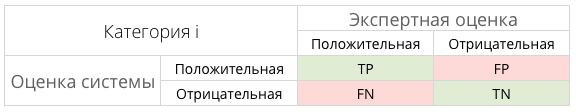 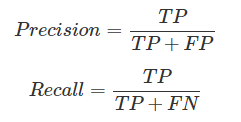


In [22]:
test_predictions = best_forest_model.predict(test_features)
accuracy = accuracy_score(test_target, test_predictions)
precision = precision_score(test_target, test_predictions)
recall = recall_score(test_target, test_predictions)
print('Accuracy =', accuracy, 'Precision =', precision, 'Recall =', recall)

Accuracy = 0.8102643856920684 Precision = 0.732484076433121 Recall = 0.5897435897435898


Для оценки адеватности используется F-мера - среднее гармоническое между precision и recall. Если хотя бы один из параметров близок к нулю, то и F-мера стремится к 0. Если оба стремятся к 1, то F-мера тоже стремится к 1.

In [23]:
f_score = f1_score(test_target, test_predictions)
print('F-мера =', f_score)

F-мера = 0.6534090909090909


<b>Вывод по разделу 5:

Адекватность модели оценивается по нескольким параметрам. Для модели классификации это accuracy, precision и recall. Качество модели лучше всего отражают precision и recall и эти метрики складываются в F-мера как единую оценку модели.

Модель получилась среднего качества. И для таких задач она адекватна.

### Итоговый вывод:

В ходе проделанной работы было выполнено:

1. Изучен файл с данными.
2. Разбиты данные на три выборки: обучающая, валидационная и тестовая.
3. Исследованы три модели классификации: Решающее дерево, Случайный лес и Логистическая регрессия.
4. Найдены оптимальные параметры для каждой модели и выбрана одна из них для обучения модели.
5. Оценена точность обученной модели.
6. Оценена адекватность модели.

Для обучения модели было использована выборка в 2000 значений. Этого может быть недостаточно для повышения ключевых параметров модели классификатора. Увеличение в 10 или 100 увеличит accuracy, precision и recall, а также время обучения.

Адекватность модели повышается с ростом количества значений.